In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns

PART 1: EDA

In [2]:
#read data
df = pd.read_json('/Users/dankang/Downloads/ultimate_challenge/ultimate_data_challenge.json')
login_df = pd.read_json('/Users/dankang/Downloads/ultimate_challenge/logins.json')

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
login_df.shape

(93142, 1)

In [6]:
login_df.dtypes

login_time    datetime64[ns]
dtype: object

In [7]:
login_df.nunique()

login_time    92265
dtype: int64

In [8]:
#keep count of each login
login_df['login_count'] = 1
login_df = login_df.set_index(pd.to_datetime(login_df['login_time'], unit='s'))[['login_count']]

# make sure everything worked
login_df.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [9]:
#resample into the proper intervals
login_15_interval = login_df.resample('15Min').sum()

In [10]:
login_15_interval.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


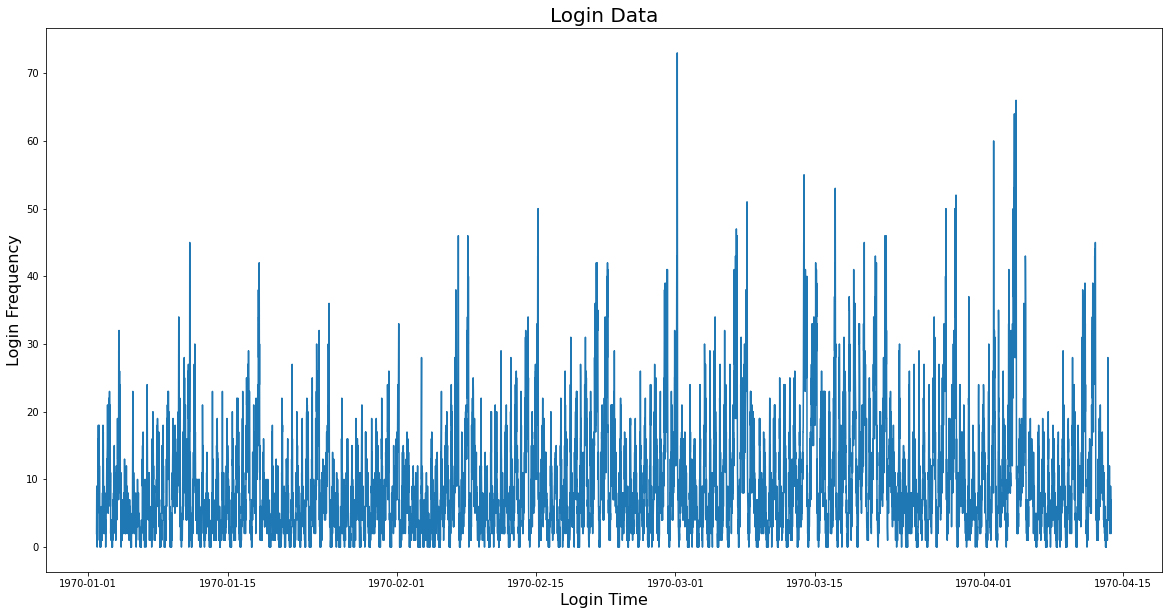

In [11]:
# scatterplot of the binned data
fig, ax = plt.subplots(figsize = (20,10))
plt.xlabel('Login Time', size=16)
plt.ylabel('Login Frequency', size=16)
plt.title('Login Data', size=20)
# puts the data in the figure
plt.plot(login_15_interval.index, login_15_interval.login_count)

In [12]:
login_15_interval.describe()

,login_count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [13]:
login_15_interval.median()

login_count    7.0
dtype: float64

Lets try to aggregate the data by day and find the busiest login times of the day


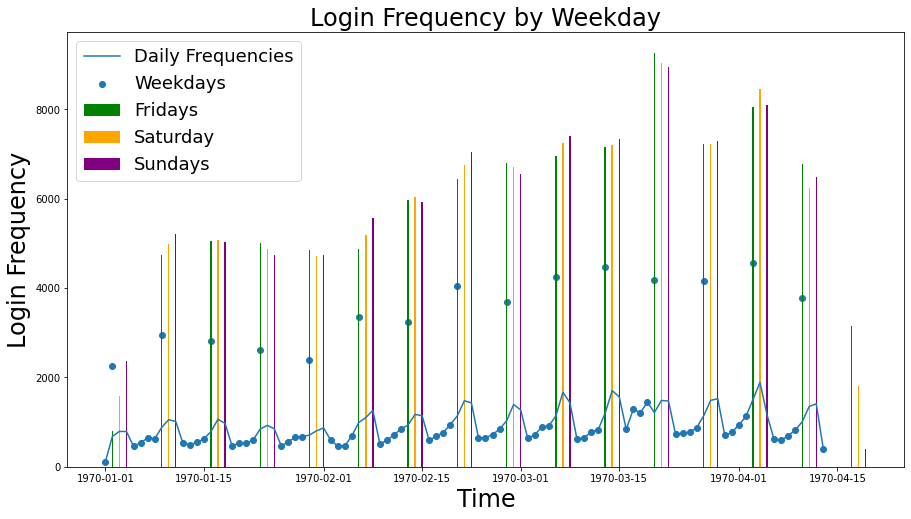

In [14]:
#resample by day
daily_logins = login_df.resample('D').sum()

#then resample by business day vs weekends
logins_biz_day = login_df.resample('B').sum()
fridays = login_df.resample('W-FRI').sum()
saturdays = login_df.resample('W-SAT').sum()
sundays = login_df.resample('W-SUN').sum()


# line, scatterplot, and histograms of the parsed data
fig, ax = plt.subplots(figsize = (15,8))
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Login Frequency', fontsize = 24)
plt.title('Login Frequency by Weekday', fontsize = 24)

#bar graphs for Friday, Saturday, Sunday

plt.bar(fridays.index, fridays.login_count, label = "Fridays", align= 'center', width = 0.2,  color = 'Green')
plt.bar(saturdays.index, saturdays.login_count, label = 'Saturday', align = 'center', width = 0.2, color = 'Orange')
plt.bar(sundays.index, sundays.login_count, label = "Sundays", align= 'center', width = 0.2, color = 'Purple')

#line plot for daily logins
plt.plot(daily_logins.index, daily_logins.login_count, label = 'Daily Frequencies')

#scatter for weekdays
plt.scatter(logins_biz_day.index, logins_biz_day.login_count, label='Weekdays')

plt.legend(loc='upper left', fontsize = 18)

Weekends clearly see the highest login frequency; however, it's tough to discern a general pattern in login frequency between Friday, Saturday, and Sunday, as some weekends see greater logins on Sundays and other weekends see greater login frequency on Fridays. Only in a couple instances are Saturdays the highest login frequency day. 

In [15]:
#lets try to find busiest hours by weekday
hourly_logins = login_df.resample('H').sum()

weekdays = list(hourly_logins.index.weekday)

In [16]:
print(weekdays)

[3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [17]:
hourly_logins['weekday'] = weekdays

In [18]:
#create an hourly column using a list comprehension
hourly_logins['hour'] = [datetime.hour for datetime in hourly_logins.index]

In [19]:
#create a dictionary so that we can map by weekday
weekday_names_dict = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [20]:
# create dataframe of the average number of logins for each hour of each day
mean_hourly_logins = pd.pivot_table(hourly_logins, values = 'login_count', index = 'hour', columns = 'weekday', aggfunc=np.mean)
mean_hourly_logins = mean_hourly_logins.rename(columns=weekday_names_dict)

In [21]:
mean_hourly_logins = mean_hourly_logins.stack(level='weekday')


In [22]:
mean_hourly_logins.name = 'avg_login_freq'

In [23]:
hourly_logins_clean_df = mean_hourly_logins.reset_index()

In [24]:
hourly_logins_clean_df.head()

,hour,weekday,avg_login_freq
0,0,Monday,35.400000
1,0,Tuesday,43.357143
2,0,Wednesday,49.071429
3,0,Thursday,58.285714
4,0,Friday,65.000000


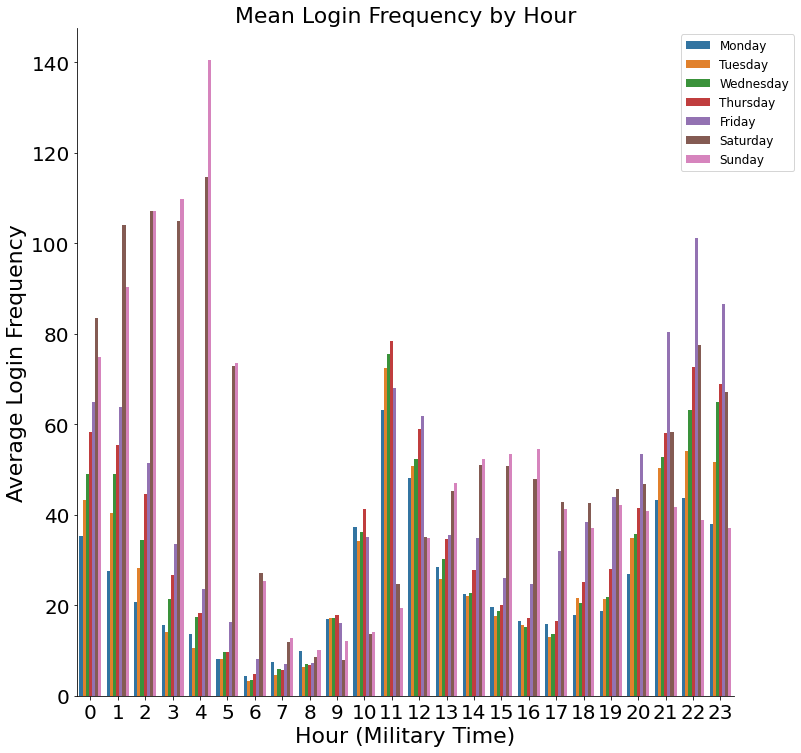

In [25]:
# plot average hourly use
sns.catplot(x='hour', y='avg_login_freq', data=hourly_logins_clean_df, kind = 'bar', 
            hue='weekday', height = 10, legend=False)
ax = plt.gca()
ax.set_title('Mean Login Frequency by Hour', fontsize = 22)
ax.set_xlabel('Hour (Military Time)', fontsize = 22)
ax.set_ylabel('Average Login Frequency', fontsize = 22)
ax.tick_params(labelsize=20,labelcolor="black")
ax.legend(bbox_to_anchor=(1.0,0.8,0.1, 0.2),fontsize=12)

Clearly login frequency is pretty great early in the morning (or late at night) on weekends, while weekday login frequency sees much more activity closer to lunch time (and a slight spike around bedtime, ~10pm). 

Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
how you will implement the experiment
what statistical test(s) you will conduct to verify the significance of the observation
how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Assuming you're able to keep a record of activity on the toll bridge, perhaps the easiest way to measure success is whether activity on the toll bridge changes significantly on weekends. On weekdays a change would be tougher to measure -- assuming drivers want to work a "regular" 9 hour" shift, they're not likely to go back and forth between the two cities all too frequently because they need to (A) sleep and (B) be situated in one spot to hit peak demand. Therefore toll activity between the two cities isn't likely to change all too much. On weekends, however, when demand is more even between the two cities, you can design an experiment to see if the average number of cars crossing the bridge changes as a result of the reimbursement.

Metric: Mean number of cars crossing the toll bridge.

Experiment: Put simply, our null hypothesis would be that the proposed toll reimbursement will not change the mean number of cars crossing the bridge (defined as going from Gotham to Metropolis, or vice versa). The experiment would involve implementing the toll reimbursement on a random weekend for a specified time slot (say, 7am to 7pm to capture a full 12 hours) and observing if there was any noticable change in the mean number of cars crossing the bridge in a certain time period leading up to the reimbursement (say 3 weeks), and the same time period post-reimbursement.

What statistical test: I would use an independent samples t-test; the population parameter and standard deviation are rarely known in reality, and in this case we are trying to compare the mean of two given samples (avg cars crossed before reimbursement, and after). Under this framework, we can reframe our null hypothesis as 

H_0:  Mean_1 = Mean_2
H_a: Mean_1 =/= Mean_2

That said, a reasonable case could be made to assume that the population parameters are known (i.e. what is the current mean traffic and std deviation on weekends), in which you could use a z-test, but for practical purposes we will stick with our method. 

How to interpret results: Lets assume we are using .05 are our barometer of significance (significance level). We would determine the t test statistic via (x - mean) / Standard Error, where the standard error is calculated as a the standard deviation / root(n), where n is our sample size. using t, DF = n-1, we can calculate a p-value which, if under .05, would suggest there is sufficient evidence to reject the null hypothesis and conclude that the toll reiumbursement actually did change the mean number of bridge crosses on weekends. Based off of this, we would present these conclusions to the city and make the recommendation to implement the change, given that the objective is to encourage driver participation in both cities. 




Part 3: Determine what factors are best for retention, and offer suggestions to operationalize.

1) Perform EDA
2) Predictive model: will user be active in 6 months?
3) Leverage insights to improve retention 

In [26]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [27]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [29]:
#convert the dates to date time objects
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [30]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [31]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [32]:
df.shape

(50000, 12)

In [33]:
df['avg_rating_of_driver'].describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [34]:
df['avg_rating_of_driver'] = df.fillna(df['avg_rating_of_driver'].mean())

In [35]:
df['avg_rating_by_driver'] = df.fillna(df['avg_rating_by_driver'].mean())

In [36]:
df = df.drop(columns=['phone'])

Retention is defined as a driver being active in the last 30 days. So we will calculate the date in which the data is pulled, and see which riders took a ride (via the last_trip_date field) in those 30 days.

In [37]:
data_pull_date = df['last_trip_date'].max()

In [38]:
# determine 30 day cutoff
cut_off_date = data_pull_date - pd.Timedelta('30 days')

df['status'] = (df.last_trip_date > cut_off_date).astype('int')

# add dummies to city which is our only categorical data
df = pd.get_dummies(df, columns = ['city'])

In [39]:
active_count = df['status'].sum()

In [40]:
print(active_count)

18310


In [41]:
print(active_count / len(df['status']))

0.3662


In [42]:
df.columns

Index(['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'ultimate_black_user',
       'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'status',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell'],
      dtype='object')

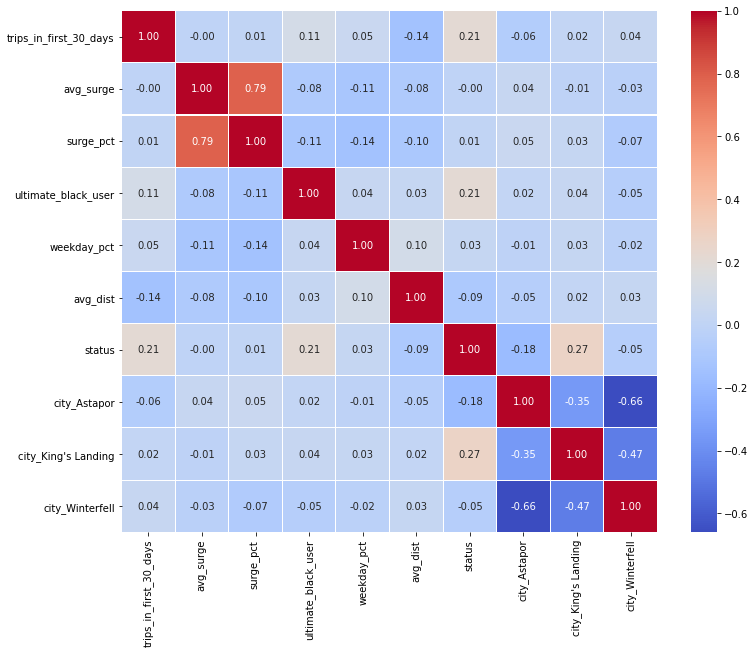

In [43]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

36.6% of users in our dataframe are active.

We will use logistic regression given that this is a classification model 

In [44]:
# define features and target
features = ['trips_in_first_30_days', 'avg_rating_by_driver', 'avg_surge',
 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
 "avg_rating_by_driver"]
X = df[features]
y = df.status
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
# Fit the model on the training data.
clf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_test), y_test))


0.6768


In [46]:
#scale data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [47]:
clf.fit(X_tr_scaled, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_te_scaled), y_test))

0.6768666666666666


In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [49]:
from sklearn.model_selection import train_test_split

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [50]:
import sklearn.model_selection
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = sklearn.model_selection.GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [52]:
clf1 = LogisticRegression(C=1)
clf1.fit(X_tr_scaled, y_train)
ypred = clf1.predict(X_te_scaled)
print("{:.4f}".format(accuracy_score(clf1.predict(X_tr_scaled), y_train)))
print("{:.4f}".format(accuracy_score(ypred, y_test)))

0.6857
0.6769


Feature: 0, Score: 0.46830
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.05935
Feature: 3, Score: 0.10604
Feature: 4, Score: 0.42597
Feature: 5, Score: 0.05685
Feature: 6, Score: -0.17627
Feature: 7, Score: 0.00000


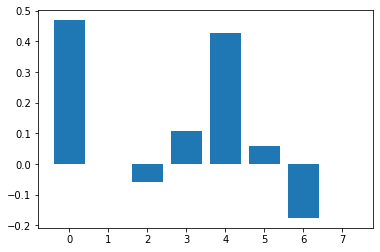

In [54]:
# get importance
importance = clf1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Trips in first 30 days as well as ultimate_black_user status is important in determining retention, which makes intuitive sense -- users with high initial frequent usage are more likely to retain, and users that are premium users are likely less price sensitive and therefore likely retain better as well. 